## Ground Motion Processing ToolBox

In [1]:
# This cell can be removed or adjusted
from google.colab import drive
drive.mount('/content/drive')
!pip install EzGM
%cd /content/drive/MyDrive/EzGM_Examples

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EzGM_Examples


In [2]:
from EzGM import GMProc
from EzGM.Utility import file_manager, RunTime
from time import time
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Acquire the run start time
startTime = time()

### 1) Read record

In [4]:
parent_path = os.path.realpath("")
gm_path1 = os.path.join(parent_path, 'input files', 'RSN1158_KOCAELI_DZC180.AT2')
gm_path2 = os.path.join(parent_path, 'input files', 'RSN1158_KOCAELI_DZC270.AT2')
dt, npts, desc, t, Ag1 = file_manager.ReadNGA(inFilename= gm_path1, content=None, outFilename=None)
dt, npts, desc, t, Ag2 = file_manager.ReadNGA(inFilename= gm_path2, content=None, outFilename=None)

### 2) Post-process PSHA results

In [5]:
# Apply baseline correction
Ag_corrected = GMProc.baseline_correction(Ag1, dt, polynomial_type='Linear')

# Apply band-pass filtering
Ag_filtered = GMProc.butterworth_filter(Ag1, dt, cut_off=(0.1, 25))

# Linear elastic analysis of a single degree of freedom system
u, v, ac, ac_tot = GMProc.sdof_ltha(Ag1, dt, T = 1.0, xi = 0.05, m = 1)

# Calculate ground motion parameters
param1 = GMProc.get_parameters(Ag1, dt, T = np.arange(0,4.05,0.05), xi = 0.05)
param2 = GMProc.get_parameters(Ag2, dt, T = np.arange(0,4.05,0.05), xi = 0.05)

# Obtain RotDxx Spectrum
Periods, Sa_RotDxx = GMProc.RotDxx_spectrum(Ag1, Ag2, dt, T = np.arange(0,4.05,0.05), xi = 0.05, xx = [0, 50, 100])

Text(0, 0.5, 'Acceleration [g]')

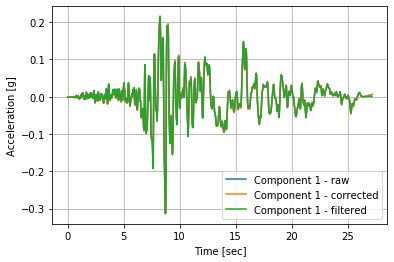

In [6]:
# Since the NGAW2 records are already processed we will not see any difference.
plt.figure()
plt.plot(t, Ag1, label='Component 1 - raw')
plt.plot(t, Ag_corrected, label='Component 1 - corrected')
plt.plot(t, Ag_filtered, label='Component 1 - filtered')
plt.legend()
plt.grid(True)
plt.xlabel('Time [sec]')
plt.ylabel('Acceleration [g]')

Text(0, 0.5, 'Sa [g]')

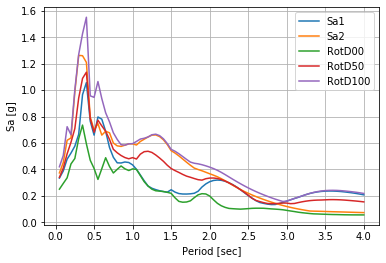

In [7]:
plt.figure()
plt.plot(param1['Periods'], param1['PSa'], label='Sa1')
plt.plot(param2['Periods'], param2['PSa'], label='Sa2')
plt.plot(Periods, Sa_RotDxx[0], label='RotD00')
plt.plot(Periods, Sa_RotDxx[1], label='RotD50')
plt.plot(Periods, Sa_RotDxx[2], label='RotD100')
plt.legend()
plt.grid(True)
plt.xlabel('Period [sec]')
plt.ylabel('Sa [g]')

In [8]:
# Calculate the total time passed
RunTime(startTime)

Run time: 0 hours: 0 minutes: 2.36 seconds
